# **Classifying Handwritten Digits using CNN**

In [23]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn import model_selection
import json
import matplotlib.pyplot as plt

In [14]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils

In [15]:
# loading train data from csv file
X_train = pd.read_csv('mnist_train.csv')
# loading test data from csv file
X_test = pd.read_csv('mnist_test.csv')


In [16]:
# dropping 'target' class from the data
y_train = np.array(X_train['target'])
X_train = X_train.drop(['target'], axis=1)


X_train = X_train / 255


# converting target into one hot encoding form
X_train = np.array(X_train)
b = np.zeros((y_train.size, y_train.max()+1))
b[np.arange(y_train.size), y_train] = 1
y_train = np.array(b)

X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
print(X_train.shape[0])


60000


In [17]:
# dropping 'target' class from the data
y_test = np.array(X_test['target'])
X_test = X_test.drop(['target'], axis=1)


X_test = X_test / 255


# converting target into one hot encoding form
X_test = np.array(X_test)
b = np.zeros((y_test.size, y_test.max()+1))
b[np.arange(y_test.size), y_test] = 1
y_test = np.array(b)

X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')
print(X_test.shape[0])


10000


In [18]:
num_classes = y_test.shape[1]

In [19]:
def baseline_model():
    # create model
    model = Sequential()
    model.add(Conv2D(32, (5, 5), input_shape=(28, 28, 1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [20]:
# splitting test data into validation and test
X_test, X_val, y_test, y_val = model_selection.train_test_split(X_test, y_test, test_size=0.1)

In [30]:
# build the model
model = baseline_model()
# Fit the model
history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=200, verbose=2)

Train on 60000 samples, validate on 1000 samples
Epoch 1/10
 - 23s - loss: 0.2500 - acc: 0.9282 - val_loss: 0.0945 - val_acc: 0.9690
Epoch 2/10
 - 25s - loss: 0.0776 - acc: 0.9772 - val_loss: 0.0549 - val_acc: 0.9840
Epoch 3/10
 - 26s - loss: 0.0519 - acc: 0.9842 - val_loss: 0.0630 - val_acc: 0.9810
Epoch 4/10
 - 25s - loss: 0.0436 - acc: 0.9863 - val_loss: 0.0579 - val_acc: 0.9820
Epoch 5/10
 - 25s - loss: 0.0340 - acc: 0.9896 - val_loss: 0.0450 - val_acc: 0.9840
Epoch 6/10
 - 24s - loss: 0.0268 - acc: 0.9917 - val_loss: 0.0474 - val_acc: 0.9840
Epoch 7/10
 - 25s - loss: 0.0241 - acc: 0.9927 - val_loss: 0.0395 - val_acc: 0.9890
Epoch 8/10
 - 25s - loss: 0.0202 - acc: 0.9935 - val_loss: 0.0384 - val_acc: 0.9870
Epoch 9/10
 - 24s - loss: 0.0168 - acc: 0.9945 - val_loss: 0.0403 - val_acc: 0.9860
Epoch 10/10
 - 32s - loss: 0.0149 - acc: 0.9950 - val_loss: 0.0365 - val_acc: 0.9890


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


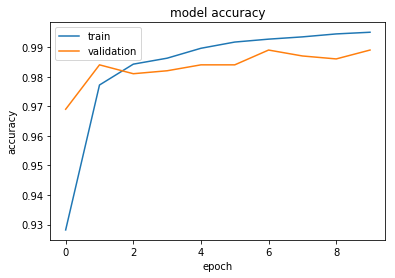

In [31]:
# plotting accuracy vs epochs 
print(history.history.keys())

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


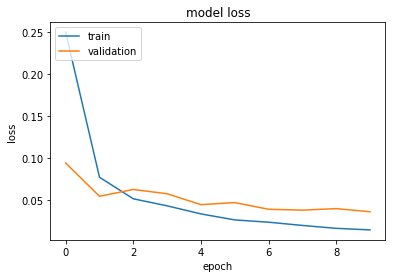

In [32]:
# plotting loss vs epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [33]:
# evaluating model on test data
print("Evaluate on test data")
results = model.evaluate(X_test, y_test, batch_size=200)
print("test loss, test acc:", results)

Evaluate on test data
9000/9000 [==============================] - 1s 112us/step
test loss, test acc: [0.03139475172696014, 0.9907777865727743]


### Final Accuracy = 99.07%